# Sample Sankay
- sankay plot to display bks set of cbc metagenomics samples
- goal: use sankay to display fates over time of tagged colonies (that were sequenced) and have number of samples (or preferably numbers of circles) of those colonies at each time point
- https://github.com/davidsjoberg/ggsankey - it should be possible to do numbers, but don't know if i can add in the additional feature of sample to colony? 

In [96]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(tidyr)
library(purrr)
library(stringr)
library(reshape2) 
library(ggsankey)

In [97]:
samplelist<-read.table('../inputs/genohublist_sctld2024.txt', header = FALSE)
colony <- read_csv("/Users/brookesienkiewicz/Documents/sctld/SCTLD_samples/Sample_Data/CBC_ColonyData.csv", show_col_types = FALSE)
sctld_samples <- read.csv("/Users/brookesienkiewicz/Documents/sctld/SCTLD_samples/Sample_Data/CBC_samples.csv")

New names:
• `` -> `...1`


In [98]:
# add colony ids to all dfs
add_colonyid <- function(df) {
    # get transect # 
    df$transect_id <- paste0('T',df$TransectNum)
    # make colony id 
    df$colony_id <- paste(df$transect_id, df$NewTagNum, df$Species,
                                 sep = "_")
    return(df)
}

# apply 
sctld_samples<-add_colonyid(sctld_samples)
colony <- add_colonyid(colony)

In [99]:
colnames(sctld_samples)

[1] "Month_year"                   "Country"                     
 [3] "Location"                     "CollectionDate"              
 [5] "Transect"                     "TransectNum"                 
 [7] "OldTagNum"                    "NewTagNum"                   
 [9] "Species"                      "Time_sampled"                
[11] "Time_processed"               "Sample_type"                 
[13] "SampleNum"                    "Health_status"               
[15] "Sampling_notes"               "Tubelabel_species"           
[17] "Sample_physical_location"     "Extraction_physical_location"
[19] "Date_sequenced"               "Notes"                       
[21] "transect_id"                  "colony_id"

In [100]:
#filter sample data to match sequence list 
sctld_samples<-sctld_samples %>%
    filter(Sample_type == 'Core_EtOH') %>%
    filter(Tubelabel_species %in% samplelist$V1) %>%

    # and only keep disease tissue for visualizing for now 
    filter(Health_status != "Diseased_Margin")
nrow(sctld_samples)

# filter colony data to match sequence list 
colony <- colony %>%
    filter(colony_id %in% sctld_samples$colony_id)

length(unique(sctld_colony$colony_id))
# 113 unique colonies - 220 total samples, only 197 if excl disease margin

[1] 197

[1] 113

In [101]:
# convert condition columns in colony data to month year format 

## change colnames into dates 
# list columns with dates
tf <- grepl('Condition', colnames(colony))
date_col <- colnames(colony)[tf]

# get rid of 'condition' to have col names just contain the date
new_col<-gsub('_Condition', '',date_col)

# convert to mmyydd date format before final date conversion 
formatted_dates <- as.Date(paste0(new_col, "01"), format = "%m%Y%d")

# Format the dates as "Nov 2023", etc.
formatted_labels <- format(formatted_dates, "%b %Y")

# Replace the column names in clb_colony with the formatted labels
colnames(colony)[tf] <- formatted_labels 

#this is the new list of condiiton columns to use going forward
sample_dates <- c('Jun 2019','May 2022','Dec 2022')

In [102]:
# filter colony data for these dates
colony <- colony %>%
    select(colony_id, Species, any_of(sample_dates))

In [103]:
# convert collection date in sample data to month year format 

sctld_samples$dates <- as.Date(sctld_samples$CollectionDate, format = "%m/%d/%y")

# convert to mmyyyy and make separate column for written month year 
sctld_samples$Month_year <- format(sctld_samples$dates, "%b %Y")

# make all 2019 same month for simplicity 
sctld_samples[sctld_samples$Month_year=='Oct 2019',"Month_year"]='Jun 2019'

# arrange in chronological order 
sctld_samples$Month_year<-factor(sctld_samples$Month_year, levels = sample_dates) 

In [104]:
head(sctld_samples)

,Month_year,Country,Location,CollectionDate,Transect,TransectNum,OldTagNum,NewTagNum,Species,Time_sampled,⋯,Health_status,Sampling_notes,Tubelabel_species,Sample_physical_location,Extraction_physical_location,Date_sequenced,Notes,transect_id,colony_id,dates
,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>
1,Dec 2022,BEL,CBC,12/2/22,CBC30N,1,,22,OANN,,⋯,Diseased_Tissue,,122022_BEL_CBC_T1_136_OANN,Depleted_UML_NARWHAL_R1_B4,UML_NARWHAL_R2_B3,,,T1,T1_22_OANN,2022-12-02
2,May 2022,BEL,CBC,5/21/22,CBC30N,1,22,22,OANN,,⋯,Healthy,newly added May 2022,052022_BEL_CBC_T1_41_OANN,Depleted_UML_NARWHAL_R1_B3,UML_NARWHAL_R2_B3,,,T1,T1_22_OANN,2022-05-21
3,Dec 2022,BEL,CBC,12/2/22,CBC30N,1,,12,PSTR,,⋯,Healthy,,122022_BEL_CBC_T1_122_PSTR,UML_NARWHAL_R1_B4,UML_NARWHAL_R2_B26,,,T1,T1_12_PSTR,2022-12-02
4,Dec 2022,BEL,CBC,12/4/22,CBC30N,1,,6,PSTR,,⋯,Diseased_Tissue,,122022_BEL_CBC_T1_132_PSTR,UML_NARWHAL_R1_B4,UML_NARWHAL_R2_B26,,,T1,T1_6_PSTR,2022-12-04
5,Dec 2022,BEL,CBC,12/2/22,CBC30N,1,,20,PAST,,⋯,Diseased_Tissue,,122022_BEL_CBC_T1_139_PAST,UML_NARWHAL_R1_B4,UML_NARWHAL_R2_B26,,,T1,T1_20_PAST,2022-12-02
6,Dec 2022,BEL,CBC,12/2/22,CBC30N,1,,8,MCAV,,⋯,Diseased_Tissue,,122022_BEL_CBC_T1_144_MCAV,UML_NARWHAL_R1_B4,UML_NARWHAL_R2_B26,,,T1,T1_8_MCAV,2022-12-02


In [105]:
# combine colony and sample data into one df 
# head(sctld_samples)
# head(colony)
test<-colony %>% 
    pivot_longer(cols = sample_dates,
                names_to = 'Month_year',
                values_to = 'Condition')
# join by colony id and Month_year (so maybe pivot colony data long first?)
testall <- test %>%
    left_join(sctld_samples %>% select(colony_id, Month_year, Health_status),
             by = c('colony_id','Month_year')) %>%
    rename(Sample_condition = Health_status)




In [110]:
head(colony)

colony_id,Species,Jun 2019,May 2022,Dec 2022
<chr>,<chr>,<chr>,<chr>,<chr>
T1_2_PAST,PAST,Healthy,Healthy,Healthy
T1_4_PSTR,PSTR,Healthy,Diseased,Dead
T1_6_PSTR,PSTR,Healthy,Healthy,Diseased
T1_7_MCAV,MCAV,Healthy,Healthy,Healthy
T1_8_MCAV,MCAV,Healthy,Diseased,Diseased
T1_12_PSTR,PSTR,Healthy,Healthy,Healthy


In [ ]:
# pivot wide again cuz idk how to apply sankay otherwise 
head(testall)
testall %>%
    pivot_wider(names_from = Month_year, 
               values_from = Condition)

In [120]:
sample_subset<-sctld_samples %>% select(colony_id, Month_year, Health_status)
head(sample_subset)

,colony_id,Month_year,Health_status
,<chr>,<fct>,<chr>
1,T1_22_OANN,Dec 2022,Diseased_Tissue
2,T1_22_OANN,May 2022,Healthy
3,T1_12_PSTR,Dec 2022,Healthy
4,T1_6_PSTR,Dec 2022,Diseased_Tissue
5,T1_20_PAST,Dec 2022,Diseased_Tissue
6,T1_8_MCAV,Dec 2022,Diseased_Tissue


In [121]:
head(colony)

colony_id,Species,Jun 2019,May 2022,Dec 2022
<chr>,<chr>,<chr>,<chr>,<chr>
T1_2_PAST,PAST,Healthy,Healthy,Healthy
T1_4_PSTR,PSTR,Healthy,Diseased,Dead
T1_6_PSTR,PSTR,Healthy,Healthy,Diseased
T1_7_MCAV,MCAV,Healthy,Healthy,Healthy
T1_8_MCAV,MCAV,Healthy,Diseased,Diseased
T1_12_PSTR,PSTR,Healthy,Healthy,Healthy


In [117]:
sank_colors = c('Dead'='black','CLP'='blanchedalmond','CLB'='cadetblue1','Healthy'='forestgreen',
                 'DC' = 'blueviolet',
                 'Diseased' = 'firebrick',
                 'Diseased_Other' = 'coral3',
                 'Not_Visited' = 'gray30',
                 'Unknown' = 'gray78')

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


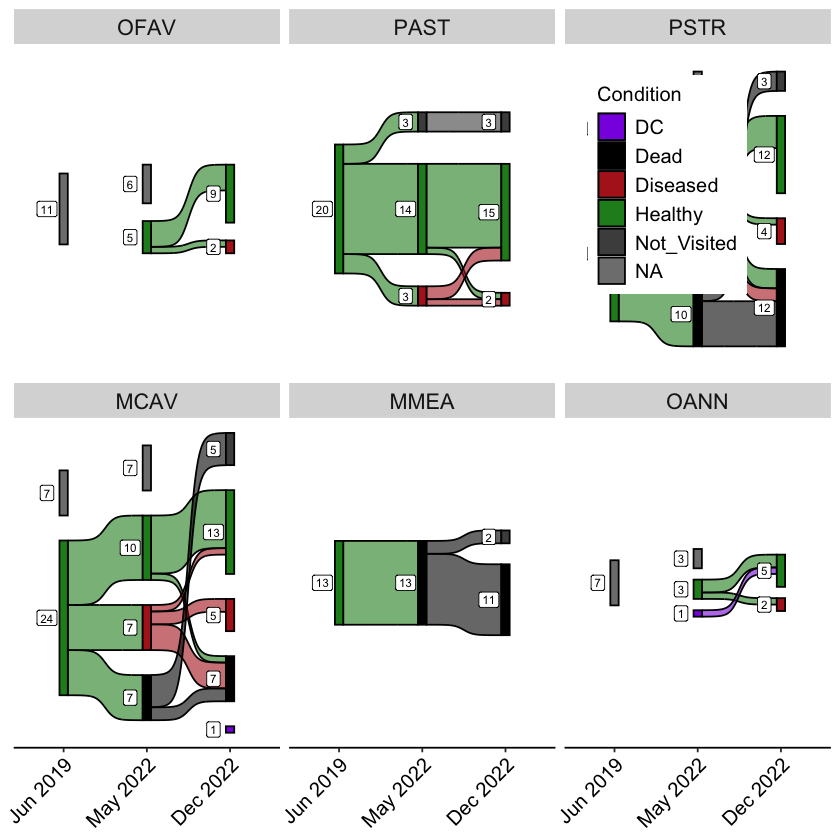

In [119]:
sankey <- ggplot(sankeydf, aes(x = x, 
                next_x = next_x, 
                node = node, 
                next_node = next_node,
               fill = factor(node))) +
   facet_wrap(~Species, as.table = FALSE) +
   geom_sankey(flow.alpha = 0.6, node.color = 'black', flow.color = 'black') +
   geom_sankey_label(
     aes(
       x = as.numeric(x) - 0.2,
       label = after_stat(freq)),
     size = 7 / .pt, color = "black", fill = "white") +  
   scale_fill_manual("Condition", values = c(sank_colors)) +
   theme(plot.title = element_text(size = 12,hjust = 0.5),
         panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         panel.background = element_blank(), axis.line.x = element_line(colour = "black"),
         strip.text = element_text(size = 13),
         axis.line.y = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank(),
         axis.text.x = element_text(colour = "black", angle = 45, hjust = 1, size = 12),
         axis.text = element_text(colour = "black"),
         axis.title.x = element_blank(),
         legend.position = c(0.8,0.8),
         legend.title = element_text(size = 12),
         legend.text = element_text(size = 12))
sankey

In [ ]:
# use make long on filtered colony first then match the sample data to x1

In [126]:
head(colony)

colony_id,Species,Jun 2019,May 2022,Dec 2022,row_id
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
T1_2_PAST,PAST,Healthy,Healthy,Healthy,1
T1_4_PSTR,PSTR,Healthy,Diseased,Dead,2
T1_6_PSTR,PSTR,Healthy,Healthy,Diseased,3
T1_7_MCAV,MCAV,Healthy,Healthy,Healthy,4
T1_8_MCAV,MCAV,Healthy,Diseased,Diseased,5
T1_12_PSTR,PSTR,Healthy,Healthy,Healthy,6


In [ ]:
# loop by colony id instead to keep that info??


In [125]:
specie_list <- levels(as.factor(colony$Species))
sankeydf <- data.frame()

for(current_Specie in specie_list) {
    # separate colony df by species
   Spec_df <- colony %>% 
    subset(Species == current_Specie) 

    # pivot longer
   sankdf <- Spec_df %>% 
     make_long(all_of(sample_dates)) %>%
     mutate("Species" = current_Specie) 
    print("sankdf")
    print(sankdf)

    # combine all species
   sankeydf <- sankeydf %>%
     bind_rows(sankdf)
    print("sankeydf")
    print(sankeydf)
 }

[1] "sankdf"
# A tibble: 93 × 5
   x        node     next_x   next_node Species
   <fct>    <chr>    <fct>    <chr>     <chr>  
 1 Jun 2019 Healthy  May 2022 Healthy   MCAV   
 2 May 2022 Healthy  Dec 2022 Healthy   MCAV   
 3 Dec 2022 Healthy  NA       NA        MCAV   
 4 Jun 2019 Healthy  May 2022 Diseased  MCAV   
 5 May 2022 Diseased Dec 2022 Diseased  MCAV   
 6 Dec 2022 Diseased NA       NA        MCAV   
 7 Jun 2019 Healthy  May 2022 Diseased  MCAV   
 8 May 2022 Diseased Dec 2022 Dead      MCAV   
 9 Dec 2022 Dead     NA       NA        MCAV   
10 Jun 2019 Healthy  May 2022 Diseased  MCAV   
# ℹ 83 more rows
[1] "sankeydf"
          x        node   next_x   next_node Species
1  Jun 2019     Healthy May 2022     Healthy    MCAV
2  May 2022     Healthy Dec 2022     Healthy    MCAV
3  Dec 2022     Healthy     <NA>        <NA>    MCAV
4  Jun 2019     Healthy May 2022    Diseased    MCAV
5  May 2022    Diseased Dec 2022    Diseased    MCAV
6  Dec 2022    Diseased     <NA>        <N

In [112]:
df

id,x1,x2,y
<int>,<chr>,<chr>,<chr>
1,A,D,sampled
2,A,D,not
3,B,E,sampled
4,B,E,sampled
5,C,F,not
6,C,F,sampled
